In [1]:
NOM = "Didenko"
PRENOM = "Ilia"

In [42]:
# imports
import networkx as nx
import matplotlib.pylab as plt
import collections
import statistics
import os
import seaborn as sns

%matplotlib inline

In [3]:
# data import
G_CT = nx.read_graphml('./fb100/Caltech36.graphml')
G_MIT = nx.read_graphml('./fb100/MIT8.graphml')
G_JH = nx.read_graphml('./fb100/Johns Hopkins55.graphml')

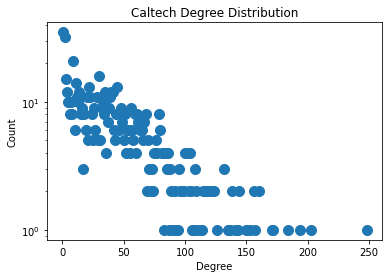

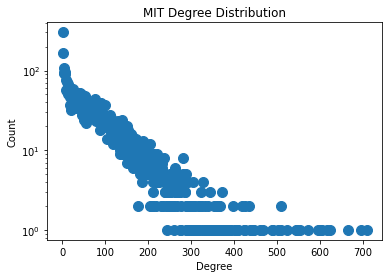

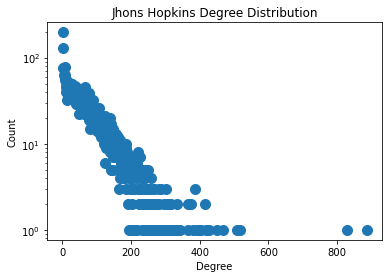

In [4]:
# Question 2.a

def Degree_Dist(G, Name):
    degree_histogram = nx.degree_histogram(G)
#     plt.bar(range(len(degree_histogram)),degree_histogram)
    plt.semilogy(range(len(degree_histogram)), degree_histogram, 'o', ms=10)
    plt.title(Name + " Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("Count")
    plt.show()

# Caltech
Degree_Dist(G_CT, "Caltech")

# MIT
Degree_Dist(G_MIT, "MIT")

# Jhons Hopkins
Degree_Dist(G_JH, "Jhons Hopkins")

The degree distributions are very simillar between the 3 schools. Caltech being the smaller one, has smaller maximum values, but follows the same logic. The majority of people have a comparably smaller numbers of connections (under 200-300 for MIT and JH, under 100 for Caltech), while people with extremely high number of connections are very rare. That is quite normal for a social network, since the graphs are usually not very connected and have large interconnected sub-groups, meaning a lot of people will have a simillar degree as their friend and this number will not cover the whole school

In [5]:
# Question 2.b
# Global Clustering Coefficient
print("Global Clustering Coefficient")

def GCC(G):
    triangles = sum(nx.triangles(G).values())
    trip = lambda x : x*(x-1)
    triplets = sum([trip(d) for n,d in G.degree])
    GCC = 3*triangles / triplets
    return GCC

# Caltech
print("Caltech:", GCC(G_CT))

# MIT
print("MIT:", GCC(G_MIT))

# Jhons Hopkins
print("Jhons Hopkins:", GCC(G_JH))

Global Clustering Coefficient
Caltech: 0.4369240351726311
MIT: 0.2704326764025364
Jhons Hopkins: 0.2897418585239102


In [6]:
# Mean Local Clustring Coefficient
print("Mean Local Clustering Coefficient")

def MLCC(G):
    MLCC = nx.average_clustering(G)
    return MLCC

# Caltech 
print("Caltech:", MLCC(G_CT))

# MIT
print("MIT:", MLCC(G_MIT))

# Jhons Hopkins
print("Jhons Hopkins:", MLCC(G_JH))

Mean Local Clustering Coefficient
Caltech: 0.40929439048517247
MIT: 0.2712187419501315
Jhons Hopkins: 0.26839307371293525


In [7]:
# Density
print("Edge Density")
    
# Caltech 
print("Caltech:", nx.density(G_CT))

# MIT
print("MIT:", nx.density(G_MIT))

# Jhons Hopkins
print("Jhons Hopkins:", nx.density(G_JH))

Edge Density
Caltech: 0.05640442132639792
MIT: 0.012118119495041378
Jhons Hopkins: 0.013910200162372396


All three of the networks can be considered scarce. Caltech being a smaller community is more inter-connected and as consequence has higher edge density and clustering coefficients. But these values are still considerably lower that those for a complete graph. So while Caltech's network is definetly less scarce, that those of MIT and JH, it can still be considered as scarce from the theoretical point of view. For MIT and JH the answer is even clearer since they are more scarce than Caltech.

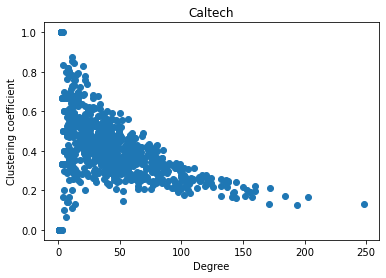

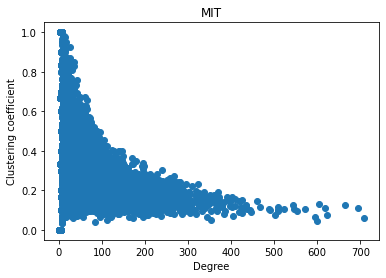

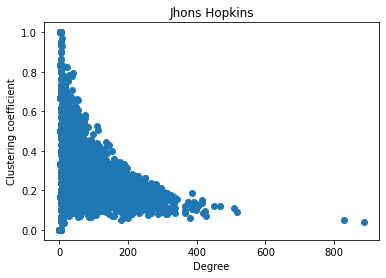

In [8]:
# Question 2.c

def ScatterPlotDegClust(G, Name):
    degree = [d for n,d in G.degree]
    clust = nx.clustering(G).values()
    plt.scatter(degree,clust)
    plt.title(Name)
    plt.xlabel("Degree")
    plt.ylabel("Clustering coefficient")
    plt.show()
    
# Caltech
ScatterPlotDegClust(G_CT, "Caltech")

# MIT
ScatterPlotDegClust(G_MIT, "MIT")

# Jhons Hopkins
ScatterPlotDegClust(G_JH, "Jhons Hopkins")
    

We can see that the clustering coefficient for the highest degree vertexes at Caltech is higher than for those at MIT and JH. It goes down to about 0.2 while at bigger schools this values goes down to 0.1 or even lower. This explains the higher clustering coefficients and the higher degree density for Caltech. We can imagine that since the school is smaller, its community is "close-nit". And while the average number of friends might be simillar to the other schools the resulting graph would be more connected and would see higher degree values. Comparing MIT and JH between them, we can see that they have very simillar results on all the metrics, so we can conclude that the social networks of the 2 schools are built in a simillar manner.

In [19]:
# Question 3
# Data import and processing

size = []
student_fac_assort = []
major_assort = []
degree_assort = []
dorm_assort = []

files = os.listdir("./fb100")
for file in files:
    G = nx.read_graphml("./fb100/" + file)
    size.append(nx.number_of_nodes(G))
    student_fac_assort.append(nx.attribute_assortativity_coefficient(G,'student_fac'))
    major_assort.append(nx.attribute_assortativity_coefficient(G,'major_index'))
    degree_assort.append(nx.degree_assortativity_coefficient(G))
    dorm_assort.append(nx.attribute_assortativity_coefficient(G,'dorm'))

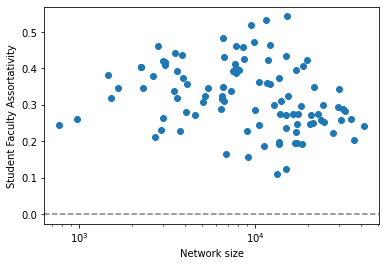

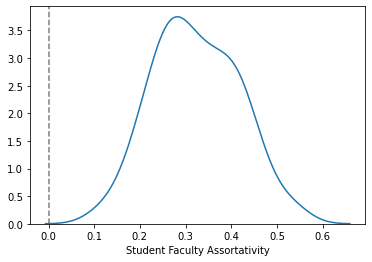

In [63]:
# Student Faculty Assortativity Coefficient
plt.scatter(size,student_fac_assort)
plt.xlabel("Network size")
plt.ylabel("Student Faculty Assortativity")
plt.xscale("log")
plt.axhline(y=0, linestyle='dashed', color='grey')
plt.show()

plt.axvline(x=0, linestyle='dashed', color='grey')
sns.distplot(student_fac_assort, hist = False)
plt.xlabel("Student Faculty Assortativity")
plt.show()

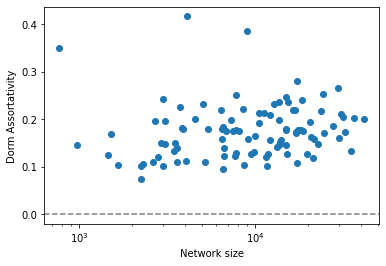

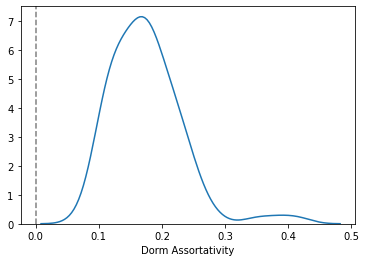

In [59]:
# Student Faculty Assortativity Coefficient
plt.scatter(size,dorm_assort)
plt.xlabel("Network size")
plt.ylabel("Dorm Assortativity")
plt.xscale("log")
plt.axhline(y=0, linestyle='dashed', color='grey')
plt.show()

plt.axvline(x=0, linestyle='dashed', color='grey')
sns.distplot(dorm_assort, hist = False)
plt.xlabel("Dorm Assortativity")
plt.show()

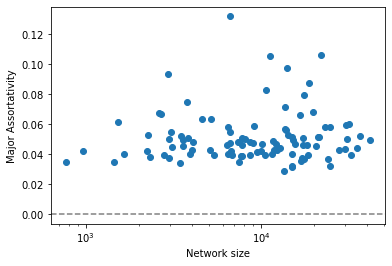

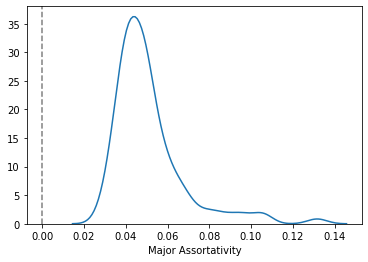

In [62]:
# Student Faculty Assortativity Coefficient
plt.scatter(size,major_assort)
plt.xlabel("Network size")
plt.ylabel("Major Assortativity")
plt.xscale("log")
plt.axhline(y=0, linestyle='dashed', color='grey')
plt.show()

plt.axvline(x=0, linestyle='dashed', color='grey')
sns.distplot(major_assort, hist = False)
plt.xlabel("Major Assortativity")
plt.show()

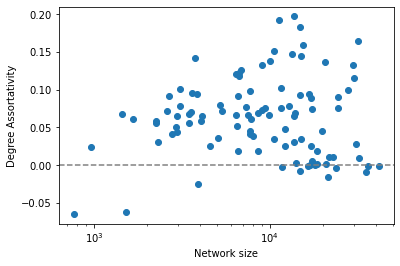

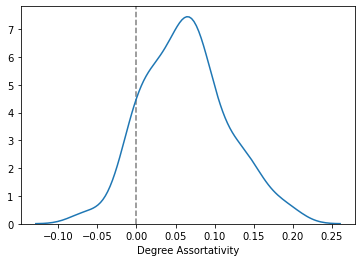

In [57]:
# Student Faculty Assortativity Coefficient
plt.scatter(size,degree_assort)
plt.xlabel("Network size")
plt.ylabel("Degree Assortativity")
plt.xscale("log")
plt.axhline(y=0, linestyle='dashed', color='grey')
plt.show()

plt.axvline(x=0, linestyle='dashed', color='grey')
sns.distplot(degree_assort, hist = False)
plt.xlabel("Degree Assortativity")
plt.show()

We see that the vertex values, such as major, dorm and student/faculty status, are positively assortative, meaning the connections are more likely to be made between people sharing the same value, so between people of the same major, living in the same dorm or having the same status on campus. The student / faculty value see the most positive assortativy, meaning the connection is more likely between people of the same status. The same goes for people living in the same dorm, doing the same major being more likely to be connected.  
The only examples of disassortativity we can see are in degree assortativity for some of the universities. There high degree nodes tend to be connected with the smaller degree nodes. But the majority of establishements are still asortative by degree.

In [11]:
import torch
import numpy as np
import random

# Question 4
G = G_MIT
N = len(G.nodes)

# Adjacency matrix and tensor
P = np.zeros((N, N))
for node in G.nodes:
    deg = len(G.adj[node])
    for nbr in G.adj[node]:
        P[int(node)][int(nbr)] = 1/deg
P_tensor = torch.tensor(P)

In [12]:
# Label propagation algorithm
def LabelPropagation(Y, P_tensor, fixed_labels):
    while (True):
        Y_tensor = torch.tensor(Y)
        Y_tensor = torch.matmul(P_tensor, Y_tensor)
        Y_new = Y_tensor.numpy()
        for label in fixed_labels.keys():
            Y_new[label] = Y[label]
        if (Y_new == Y).all():
            break
        else:
            Y = Y_new
    return Y

In [13]:
# Initial Label Matrix Y
def LabelMatrix(G,attr):
    labels = np.unique(list(nx.get_node_attributes(G,attr).values()))
    index_map = {}
    for label in labels:
        if not label == 0:
            index_map[label] = len(index_map)

    N = len(G.nodes)
    M = len(index_map)

    Y = np.zeros((N, M))
    fixed_labels = {}

    for node in G.nodes.data(attr):
        node_attr = node[1]
        node_index = int(node[0])
        if not node_attr == 0:
            Y[node_index][index_map[node_attr]] = 1
            fixed_labels[node_index] = index_map[node_attr]
    
    return Y, fixed_labels

In [14]:
# Delete Labels with fixed probability, i.e. delete 10% of labels
def DeleteLabels(Y, prob, fixed_labels):
    deleted_labels = []
    for i in range(len(Y)):
        if random.random() < prob and i in fixed_labels.keys():
            Y[i] = np.zeros((1,len(Y[i])))
            deleted_labels.append(i)
            
    return Y, deleted_labels

In [15]:
# Test Label Propagation for a given attribute and deletion probability
def TestLabelPropagation(G, attr, prob, Y_old, fixed_labels):    
    Y_del, deleted_labels = DeleteLabels(Y_old, prob, fixed_labels)
    correct_labels = {}
    for label in deleted_labels:
        correct_labels[label] = fixed_labels[label]
        fixed_labels.pop(label)

    Y_new = LabelPropagation(Y_del, P_tensor, fixed_labels)

    correct_predictions = 0
    absolute_error = 0
    N = len(deleted_labels)
    for label in deleted_labels:
        local_max = 0
        local_max_index = -1
        absolute_error = 0
        for i in range(len(Y[label])):
            if Y_new[label][i] > local_max:
                local_max = Y_new[label][i]
                local_max_index = i
            absolute_error += abs(Y_old[label][i] - Y_new[label][i])

        correct_predictions += (local_max_index == correct_labels[label])

    accuracy = correct_predictions / N
    mean_absolute_error = absolute_error / N

    return accuracy, mean_absolute_error

In [16]:
attributes = ['dorm','major_index','gender']
probabilities = [0.1, 0.2, 0.3, 0.4]

ACC = np.zeros((3,4))
MAE = np.zeros((3,4))

for i in range(3):
    Y, fixed_labels = LabelMatrix(G, attributes[i])
    for j in range(4):
        acc, mae = TestLabelPropagation(G, attributes[i], probabilities[j], Y, fixed_labels)
        ACC[i][j] = acc
        MAE[i][j] = mae

In [17]:
from tabulate import tabulate
from IPython.display import display

row_indexes = ['Dorm', 'Major', 'Gender']

print('Accuracy of Label propagation for the MIT Graph')
display(tabulate(ACC, headers=probabilities, showindex=row_indexes, tablefmt='html'))

print('Mean Absoulte Error of Label propagation for the MIT Graph')
display(tabulate(MAE, headers=probabilities, showindex=row_indexes, tablefmt='html'))

Accuracy of Label propagation for the MIT Graph


,0.1,0.2,0.3,0.4
Dorm,0.717017,0.674685,0.666667,0.579568
Major,0.315693,0.325933,0.281034,0.276852
Gender,0.724138,0.672968,0.694334,0.693805


Mean Absoulte Error of Label propagation for the MIT Graph


,0.1,0.2,0.3,0.4
Dorm,0.00191205,0.00114548,0.000966184,0.000982318
Major,0.00182482,0.00100908,0.000862069,0.000925926
Gender,0.00164204,0.00094518,0.000798085,0.000884956


Looking at the MIT dataset, we see that the label propagation is a lot more accurate for the dorm and the gender attributes than for the major. I think it can be explained by the fact that the people can meet by living in the same dorm or going the same parties, without being in the same major. Even courses can sometimes be shared between majors, which also contributes to inter-major connections, which by consequence reduces the accuracy of the label propagation.  
If we compare the accuracy between the dorm and the gender attributes, we can see that they start at about the same accuracy for 10% deletion, but Dorm is more affected by larger proportions. That means that the inter-dorm connections are more frequent than inter-gender ones, since we still have a good accuracy for gender, while deleting 40% of the labels. The fact that the female population on campus is likely a minority might have as well. Since I am using a probabilistic approach to deleting the labels. The probability of deleting a label of the male student will be higher and the propagation algorithm is likely to predict the majority label, which in turns gives good accuracy.  
Analysing Mean Absolute Error is a lot harder. For some reason we are seeing basically the same values across the board. The error is even larger for the smaller deletion proportion that seems quite counter-intuitive to me.